<a href="https://colab.research.google.com/github/ykitaguchi77/ImageProcessing/blob/master/Arrange_images4*5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**フォルダ内の画像を、2×4のカラム状に並べて出力するスクリプト**
すでに500*400pixに整形されているものを準備する
Grav, contそれぞれについてカラム状に並べたものを作る
カラム状のものを縦に結合して最終的な画像を作る



In [1]:
from PIL import Image
import glob
import os
from matplotlib import pyplot as plt
%matplotlib inline  

#Google colabをマウント
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
#画像のリストを取得
img_path = glob.glob("/content/drive/My Drive/Grav_bootcamp/Training_500px/cont/*")
save_path = "/content/drive/My Drive/Grav_bootcamp/Training_separately_20images/cont"
if not os.path.exists(save_path):
    os.makedirs(save_path)
print(len(img_path))
#print(img_path)


"""
#画像のサイズを確認
for i in im_list:
    img = Image.open(i)
    width, height = img.size
    print("width:"+str(width)+", height:"+str(height)+", width/height:"+str(width/height))
"""

240


'\n#画像のサイズを確認\nfor i in im_list:\n    img = Image.open(i)\n    width, height = img.size\n    print("width:"+str(width)+", height:"+str(height)+", width/height:"+str(width/height))\n'

#**画像の配列**
参考サイト： https://note.nkmk.me/python-pillow-concat-images/

In [6]:
def get_concat_h_multi_resize(im_list, resample=Image.BICUBIC):
    min_height = min(im.height for im in im_list)
    im_list_resize = [im.resize((int(im.width * min_height / im.height), min_height),resample=resample)
                      for im in im_list]
    total_width = sum(im.width for im in im_list_resize)
    dst = Image.new('RGB', (total_width, min_height))
    pos_x = 0
    for im in im_list_resize:
        dst.paste(im, (pos_x, 0))
        pos_x += im.width
    return dst

def get_concat_v_multi_resize(im_list, resample=Image.BICUBIC):
    min_width = min(im.width for im in im_list)
    im_list_resize = [im.resize((min_width, int(im.height * min_width / im.width)),resample=resample)
                      for im in im_list]
    total_height = sum(im.height for im in im_list_resize)
    dst = Image.new('RGB', (min_width, total_height))
    pos_y = 0
    for im in im_list_resize:
        dst.paste(im, (0, pos_y))
        pos_y += im.height
    return dst

def get_concat_tile_resize(im_list_2d, resample=Image.BICUBIC):
    im_list_v = [get_concat_h_multi_resize(im_list_h, resample=resample) for im_list_h in im_list_2d]
    return get_concat_v_multi_resize(im_list_v, resample=resample)

In [7]:
#イメージの数を入力（少なくすることで試すことができる）
img_path = img_path[0:240]
print(img_path)
im = [0]*240


#画像を4*5で配列して保存
k=0
j=0
m=1
for p in range(12): #rangeの中身は結合画像の数。すなわちイメージ数１//20。
    im_list = img_path[k:k+20]
    
    j=0
    for i in im_list:
        im[j] = Image.open(i)
        j+=1
        
    get_concat_tile_resize([[im[0],im[1],im[2],im[3],im[4]],[im[5],im[6],im[7],im[8],im[9]],[im[10],im[11],im[12],im[13],im[14]],[im[15],im[16],im[17],im[18],im[19]]]).save(save_path+"/"+ str(m)+".jpg")
    
    print("画像出力済: "+str(m))
    m+=1
    k+=20 #結合する枚数（20枚）


['/content/drive/My Drive/Grav_bootcamp/Training_500px/cont/2515.jpg', '/content/drive/My Drive/Grav_bootcamp/Training_500px/cont/6818.jpg', '/content/drive/My Drive/Grav_bootcamp/Training_500px/cont/2741.JPG', '/content/drive/My Drive/Grav_bootcamp/Training_500px/cont/4355.jpg', '/content/drive/My Drive/Grav_bootcamp/Training_500px/cont/745.jpg', '/content/drive/My Drive/Grav_bootcamp/Training_500px/cont/4386.JPG', '/content/drive/My Drive/Grav_bootcamp/Training_500px/cont/5302.JPG', '/content/drive/My Drive/Grav_bootcamp/Training_500px/cont/863.jpg', '/content/drive/My Drive/Grav_bootcamp/Training_500px/cont/7466.JPG', '/content/drive/My Drive/Grav_bootcamp/Training_500px/cont/1079.jpg', '/content/drive/My Drive/Grav_bootcamp/Training_500px/cont/6626.JPG', '/content/drive/My Drive/Grav_bootcamp/Training_500px/cont/4457.jpg', '/content/drive/My Drive/Grav_bootcamp/Training_500px/cont/7740.jpg', '/content/drive/My Drive/Grav_bootcamp/Training_500px/cont/5466.jpg', '/content/drive/My Dr

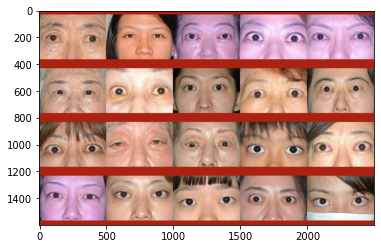

In [8]:
# 入力画像の読み込み
img = Image.open("/content/drive/My Drive/Grav_bootcamp/Training_separately_20images/grav/3.jpg")

# 規定のソフトで画像を閲覧
plt.imshow(img)
plt.show()